## Tarea 2 - Métodos de Aprendizajes de Máquinas en Data Science

### Integrantes: Sofía Álvarez, Sebastián Dinator.

In [1]:
# Importando librerías
import pandas as pd
import numpy as np
from sympy import Matrix

# k-fold cross validation
from sklearn.model_selection import KFold

# kNN
from sklearn.tree import DecisionTreeRegressor

# Árbol de desición
from sklearn.neighbors import KNeighborsRegressor

# Imagen
from IPython.display import Image

# Estandarizar
from sklearn.preprocessing import StandardScaler

In [2]:
# Importando la data
data = pd.read_csv("trainData.csv")
data

,Unnamed: 0,date,fligth_number,origin,destination,distance,noshow,denied_boarding,pax_midlow,pax_high,...,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,departure_time,capacity,revenues_usd,bookings
0,389083,2009-11-09,8995,BBA,SCL,1394,9.0,0,94,2,...,22,19,0,1,0,239,10:30:00,174.0,10631.1,240
1,177073,2009-05-23,7061,LIM,TRU,489,0.0,0,100,4,...,25,0,0,19,9,192,19:20:00,174.0,5453.7,220
2,1040357,2011-05-09,8972,SCL,PUQ,2180,4.0,0,7,1,...,2,0,0,0,10,69,09:54:00,218.0,16161.0,79
3,505258,2010-02-12,6039,CGH,CNF,524,13.0,0,54,4,...,4,0,0,26,0,64,21:00:00,174.0,10828.7,90
4,369663,2009-10-24,7713,GPS,GYE,1170,14.0,0,21,88,...,0,88,1,23,3,183,12:40:00,144.0,16721.6,209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999885,359783,2009-10-16,6024,UDI,CGH,552,5.0,0,25,12,...,12,0,0,64,9,0,15:14:00,144.0,14102.1,73
999886,152315,2009-05-03,6669,LIM,HAV,3934,4.0,0,129,3,...,2,20,0,0,118,156,08:50:00,168.0,32907.8,274
999887,1000747,2011-04-04,9094,IQQ,SCL,1430,5.0,0,2,1,...,20,36,0,7,0,124,14:18:00,218.0,13519.3,131
999888,117952,2009-04-04,7704,GYE,SCY,1091,2.0,0,67,2,...,16,0,0,34,2,98,08:05:00,144.0,8729.6,134


# Limpieza y selección de variables

### Analizando la prescencia de nulos y tipos de variables

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999890 entries, 0 to 999889
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       999890 non-null  int64  
 1   date             999890 non-null  object 
 2   fligth_number    999890 non-null  int64  
 3   origin           999890 non-null  object 
 4   destination      999890 non-null  object 
 5   distance         999890 non-null  int64  
 6   noshow           999890 non-null  float64
 7   denied_boarding  999890 non-null  int64  
 8   pax_midlow       999890 non-null  int64  
 9   pax_high         999890 non-null  int64  
 10  pax_midhigh      999890 non-null  int64  
 11  pax_low          999890 non-null  int64  
 12  pax_freqflyer    999890 non-null  int64  
 13  group_bookings   999890 non-null  int64  
 14  out_of_stock     999890 non-null  int64  
 15  dom_cnx          999890 non-null  int64  
 16  int_cnx          999890 non-null  int6

#### De lo anterior se obtiene que:
* Solo departure_time presenta nulos
* Las variables date, origin, destination, departure_time son categóriccas.

#### Considerando que kNN requiere variables numéricas para calcular distancia se decide eliminar estas variables. Además, no se cree significativo transformarlas, solo aumentarán considerablemente el número de dimensiones.
#### Sin emabrgo, las filas con nulos no se eliminaran porque se está borrando la columna (departure_time) que los contiene.

In [4]:
df = data.drop(['date', 'origin', 'destination', 'departure_time'], axis = 1)
df

,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings
0,389083,8995,1394,9.0,0,94,2,28,94,22,19,0,1,0,239,174.0,10631.1,240
1,177073,7061,489,0.0,0,100,4,4,87,25,0,0,19,9,192,174.0,5453.7,220
2,1040357,8972,2180,4.0,0,7,1,5,64,2,0,0,0,10,69,218.0,16161.0,79
3,505258,6039,524,13.0,0,54,4,7,21,4,0,0,26,0,64,174.0,10828.7,90
4,369663,7713,1170,14.0,0,21,88,18,82,0,88,1,23,3,183,144.0,16721.6,209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999885,359783,6024,552,5.0,0,25,12,20,4,12,0,0,64,9,0,144.0,14102.1,73
999886,152315,6669,3934,4.0,0,129,3,19,121,2,20,0,0,118,156,168.0,32907.8,274
999887,1000747,9094,1430,5.0,0,2,1,0,108,20,36,0,7,0,124,218.0,13519.3,131
999888,117952,7704,1091,2.0,0,67,2,7,42,16,0,0,34,2,98,144.0,8729.6,134


### Como se está trabajando con cantidad de personas en la mayoría de las variables, se revisa que no haya decimales y también la cantidad de uniques, con el fin de entender mejor el set de datos:

In [5]:
for columna in df.columns:
    if type(df[columna][0]) != str:
        print(columna.upper())
        print('Cantidad de uniques =', len(df[columna].unique()))
        display(df[df[columna]%1 != 0])

UNNAMED: 0
Cantidad de uniques = 999890


,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


FLIGTH_NUMBER
Cantidad de uniques = 4026


,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


DISTANCE
Cantidad de uniques = 754


,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


NOSHOW
Cantidad de uniques = 115


,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


DENIED_BOARDING
Cantidad de uniques = 35


,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


PAX_MIDLOW
Cantidad de uniques = 322


,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


PAX_HIGH
Cantidad de uniques = 154


,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


PAX_MIDHIGH
Cantidad de uniques = 158


,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


PAX_LOW
Cantidad de uniques = 278


,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


PAX_FREQFLYER
Cantidad de uniques = 214


,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


GROUP_BOOKINGS
Cantidad de uniques = 209


,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


OUT_OF_STOCK
Cantidad de uniques = 2


,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


DOM_CNX
Cantidad de uniques = 220


,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


INT_CNX
Cantidad de uniques = 333


,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


P2P
Cantidad de uniques = 422


,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


CAPACITY
Cantidad de uniques = 232


,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings
1047,437541,5420,590,12.0,0,83,3,6,54,18,0,0,85,2,77,174.294915,11662.4,164
4698,439135,6076,1182,5.0,0,110,5,9,89,13,0,0,13,26,187,173.705584,14245.5,226
13695,447967,5589,1607,6.0,0,86,0,0,76,20,0,0,13,0,169,174.108276,8832.6,182
22619,443874,5792,657,4.0,0,46,3,11,33,42,0,1,60,0,75,174.264840,6922.3,135
27762,440030,5408,590,6.0,0,84,0,0,53,24,1,0,10,5,146,144.244068,7185.6,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952284,454335,5844,2446,18.0,0,59,0,9,34,26,0,0,2,1,125,174.142273,21221.3,128
958702,454360,5916,590,3.0,0,88,0,2,63,10,0,0,57,0,106,174.294915,7709.7,163
959324,439988,6079,1182,2.0,0,108,0,2,95,15,0,0,15,9,196,173.705584,14357.0,220
965548,438992,6079,1182,36.0,0,60,0,0,43,14,0,0,12,3,102,173.705584,7842.8,117


REVENUES_USD
Cantidad de uniques = 310851


,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings
0,389083,8995,1394,9.0,0,94,2,28,94,22,19,0,1,0,239,174.0,10631.1,240
1,177073,7061,489,0.0,0,100,4,4,87,25,0,0,19,9,192,174.0,5453.7,220
3,505258,6039,524,13.0,0,54,4,7,21,4,0,0,26,0,64,174.0,10828.7,90
4,369663,7713,1170,14.0,0,21,88,18,82,0,88,1,23,3,183,144.0,16721.6,209
5,251495,8734,5861,6.0,0,188,4,2,85,20,0,0,0,99,200,279.0,81609.3,299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999884,122579,8878,1430,3.0,0,86,7,51,80,8,39,0,104,5,123,218.0,14169.6,232
999885,359783,6024,552,5.0,0,25,12,20,4,12,0,0,64,9,0,144.0,14102.1,73
999886,152315,6669,3934,4.0,0,129,3,19,121,2,20,0,0,118,156,168.0,32907.8,274
999887,1000747,9094,1430,5.0,0,2,1,0,108,20,36,0,7,0,124,218.0,13519.3,131


BOOKINGS
Cantidad de uniques = 581


,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


#### Es posible notar:
* Unnamed funciona a modo de ID, ya que todos los datos son diferentes entre sí (cantidad de uniques = cantidad de filas), por lo que no se considerará la variables para el entrenamiento.
* Out_of_stock solo tiene 2 unique (se analizará más adelante).
* Capacity tiene una baja cantidad de datos decimales. Estos no hacen sentido ya que representa la cantidad de asientos, es por esto que se eliminaran estas 172 filas.
* Revenues representa ganancias por lo que sí puede ser decimal.

In [6]:
# Eliminando datos que tienen decimales en capacity

eliminar = list(df[df['capacity'] % 1 != 0].index)
df = df.drop(eliminar,axis=0)
df = df.reset_index()
print(df.shape)
df.head(2)

(999718, 19)


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings
0,0,389083,8995,1394,9.0,0,94,2,28,94,22,19,0,1,0,239,174.0,10631.1,240
1,1,177073,7061,489,0.0,0,100,4,4,87,25,0,0,19,9,192,174.0,5453.7,220


### Más análisis

In [7]:
display(df.describe())
print(df.describe().shape)

,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings
count,999718.000000,9.997180e+05,999718.000000,999718.000000,999718.000000,999718.000000,999718.000000,999718.000000,999718.000000,999718.000000,999718.000000,999718.000000,999718.000000,999718.000000,999718.000000,999718.000000,999718.000000,999718.000000,999718.000000
mean,499947.870237,6.437456e+05,6109.117706,1460.855778,6.015700,0.047570,75.510574,3.807903,6.319279,57.197498,16.798840,3.829329,0.096225,25.840142,26.708132,107.085820,178.056066,14835.277687,159.634094
std,288642.978213,3.882671e+05,2050.918123,1684.637100,5.112556,0.547211,44.570278,7.251763,10.266169,38.398518,13.836479,12.299626,0.294900,32.263478,43.961292,65.524338,32.696178,17963.999498,68.630524
min,0.000000,0.000000e+00,10.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,-77206.900000,1.000000
25%,249978.250000,3.116202e+05,5380.000000,538.000000,3.000000,0.000000,46.000000,0.000000,0.000000,29.000000,7.000000,0.000000,0.000000,0.000000,0.000000,59.000000,150.000000,6286.200000,110.000000
50%,499950.500000,6.242615e+05,6036.000000,916.000000,5.000000,0.000000,77.000000,1.000000,3.000000,55.000000,14.000000,0.000000,0.000000,12.000000,5.000000,99.000000,174.000000,9692.200000,151.000000
75%,749916.750000,9.457720e+05,7190.000000,1672.000000,8.000000,0.000000,104.000000,4.000000,8.000000,82.000000,23.000000,0.000000,0.000000,42.000000,31.000000,147.000000,174.000000,15730.900000,200.000000
max,999889.000000,1.350331e+06,9264.000000,11380.000000,271.000000,53.000000,344.000000,195.000000,230.000000,296.000000,236.000000,240.000000,1.000000,262.000000,357.000000,564.000000,451.000000,335775.400000,608.000000


(8, 19)


#### Es posible notar:
* Revenue puede ser negativo, ya que puede significar que el vuelo tuvo pérdida. Se decide no considerar esta variable para el entrenamiento, ya que se relaciona con la cantidad de personas que compró cada categoría.
* Aunque flight_number está representado con números, la variable es categórica, no tiene sentido calcular el promedio entre dos de ellos, por ejemplo. Nuevamente, transformarla solo aumentará el número de variables considerablemnte, por lo que se dejará fuera.

#### Out_of_stock solo tiene 0 y 1. Lo que llama la atención, ya que esto indica que la mayor cantidad de días sin ventas es 1.

In [8]:
######## Anlizando cuántos vuelos no tuvieron ventas por 1 día.
df.loc[df.out_of_stock == 1, 'sum_out_stock'] = 1
df.loc[df.denied_boarding < 1, 'sum_out_stock'] = 0
print(f"{df['sum_out_stock'].sum()} vuelos, es decir, un {round(df['sum_out_stock'].sum()*100/len(df), 2)}%")

4440.0 vuelos, es decir, un 0.44%


#### Dado que la cantidad de filas con 1 es un porcentaje pequeño, en otras palabras, casi un 99% de las filas tiene 0, se considera que la variable no aporta información, por lo que se eliminará.

In [9]:
######## Anlizando la cantidad de vuelos que denegó abordajes.
df.loc[df.denied_boarding >= 1, 'sum_denied'] = 1
df.loc[df.denied_boarding < 1, 'sum_denied'] = 0
print(f"{df['sum_denied'].sum()} vuelos, es decir, un {round(df['sum_denied'].sum()*100/len(df), 2)}%")

13779.0 vuelos, es decir, un 1.38%


#### Por la misma razón que con out_of_stock se dejará afuera esta variable. Además, si bien se puede tener este dao  antes de que salga el vuelo, no permite estimar el noshow con anticipación.

#### Nos pareció extraño que la distancia mínima entre dos aeropuertos fuera 14 millas, así que investigamos un poco al respecto.

,Unnamed: 0,date,fligth_number,origin,destination,distance,noshow,denied_boarding,pax_midlow,pax_high,...,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,departure_time,capacity,revenues_usd,bookings
5261,215567,2009-06-25,5362,SDU,GIG,14,4.0,0,27,0,...,8,0,0,51,0,21,NaN,144.0,180.1,72
86908,546431,2010-03-21,5305,GIG,SDU,14,3.0,0,26,0,...,11,0,0,40,0,0,23:30:00,144.0,0.0,40
503686,59595,2009-02-16,5325,GIG,SDU,14,0.0,0,34,1,...,21,0,0,74,0,0,NaN,144.0,0.0,74
580210,531123,2010-03-07,5307,GIG,SDU,14,8.0,0,100,0,...,16,0,0,126,0,0,22:30:00,144.0,0.0,126


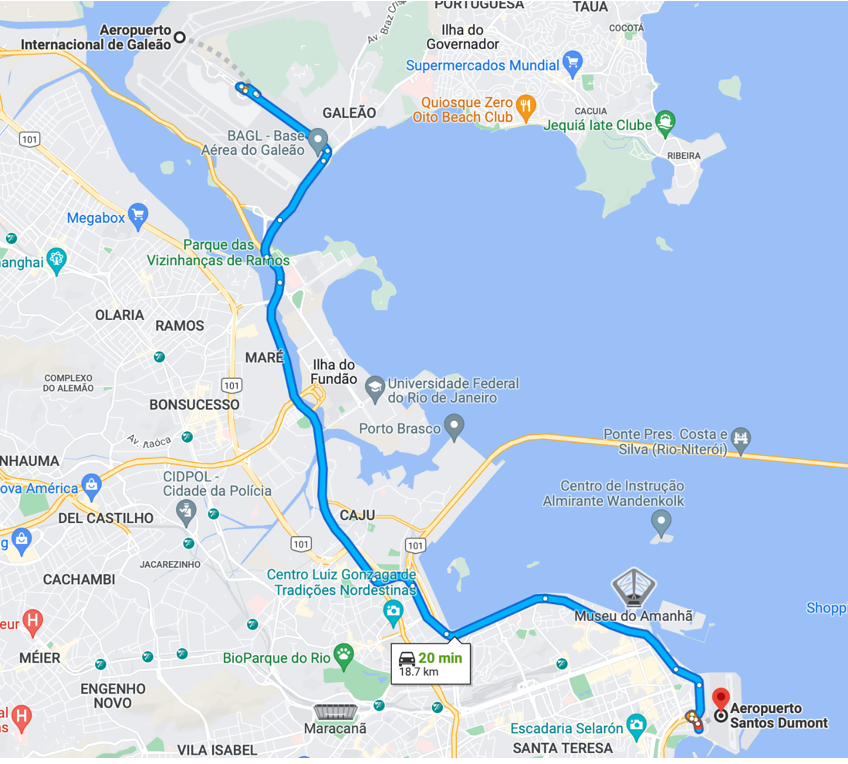

In [10]:
display(data[data['distance'] == 14])
# Y encontramos que efectivamente es verdad.
Image(filename='mapa14km.png', width=500, height=300)

#### Anlizando si pax_high, pax_midhigh, pax_midlow, pax_low, pax_freqflyer están contenidas en bookings

In [11]:
datAnalisis1 = df[["Unnamed: 0","bookings"]]
datAnalisis1["suma"] = df["pax_high"] + df["pax_midhigh"] + df["pax_midlow"] + df["pax_low"] + df["pax_freqflyer"]

count = 0
for i in range(df.shape[0]):
    if (datAnalisis1["bookings"].iloc[i] != datAnalisis1["suma"].iloc[i]):
        print(datAnalisis1["bookings"].iloc[i])
    else: 
        count += 1
print("Hay:", count, "coincidencias", "de un total de", datAnalisis1.shape[0], "datos")


<ipython-input-11-4927b34a4b64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datAnalisis1["suma"] = df["pax_high"] + df["pax_midhigh"] + df["pax_midlow"] + df["pax_low"] + df["pax_freqflyer"]


Hay: 999718 coincidencias de un total de 999718 datos


#### Conclusión: bookings contiene a esas variables. Es por esto que bookings se podría dejar fuera para el entrenamiento.

In [12]:
#### Para optimizar el número de variables se unen los 2 pax_high y 2 pax_low
df['paxH'] = (df['pax_high'] + df['pax_midhigh'])
df['paxL'] = (df['pax_low'] + df['pax_midlow'])
print(df.shape)
df.head(2)

(999718, 23)


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,...,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings,sum_out_stock,sum_denied,paxH,paxL
0,0,389083,8995,1394,9.0,0,94,2,28,94,...,1,0,239,174.0,10631.1,240,0.0,0.0,30,188
1,1,177073,7061,489,0.0,0,100,4,4,87,...,19,9,192,174.0,5453.7,220,0.0,0.0,8,187


In [13]:
######## Anlizando la cantidad de vuelos que tuvieron noshow.
df.loc[df.noshow >= 1, 'sum_noshow'] = 1
df.loc[df.noshow < 1, 'sum_noshow'] = 0
print(f"{df['sum_noshow'].sum()} vuelos, es decir, un {round(df['sum_noshow'].sum()*100/len(df), 2)}%")

928632.0 vuelos, es decir, un 92.89%


## Variables seleccionadas

In [14]:
dataKNN = df[['distance', 'capacity',
               'dom_cnx', 'int_cnx', 'p2p', 
               'paxL', 'paxH', 'pax_freqflyer', 'group_bookings']]
dataKNN

,distance,capacity,dom_cnx,int_cnx,p2p,paxL,paxH,pax_freqflyer,group_bookings
0,1394,174.0,1,0,239,188,30,22,19
1,489,174.0,19,9,192,187,8,25,0
2,2180,218.0,0,10,69,71,6,2,0
3,524,174.0,26,0,64,75,11,4,0
4,1170,144.0,23,3,183,103,106,0,88
...,...,...,...,...,...,...,...,...,...
999713,552,144.0,64,9,0,29,32,12,0
999714,3934,168.0,0,118,156,250,22,2,20
999715,1430,218.0,7,0,124,110,1,20,36
999716,1091,144.0,34,2,98,109,9,16,0


In [15]:
# Función para calcular el symmetric mean absolute percentage error (sMAPE)
def calculate_sMAPE(actual, predicted): 
    flag = []

    for a,p in zip(actual, predicted):
        
        if a == 0 and p == 0:
            flag.append(0) # Si ambos son cero sMAPE = 0  
        else:
            flag.append(np.abs(a - p) / (np.abs(a) + np.abs(p)))
                    
    return  round(np.mean(flag)*100, 3), round(np.std(flag), 3)
  

# kNN

#### La data se estandariza porque kNN calcula distancia y tenemos variables con distintas escalas

In [16]:
scaler = StandardScaler()
scaler.fit(dataKNN)

data_estandar = pd.DataFrame(scaler.transform(dataKNN), columns=dataKNN.columns)
data_estandar['noshow'] = data['noshow']
print(data_estandar.shape)
data_estandar.head(3)

(999718, 10)


,distance,capacity,dom_cnx,int_cnx,p2p,paxL,paxH,pax_freqflyer,group_bookings,noshow
0,-0.039686,-0.124053,-0.769916,-0.607538,2.013210,0.830775,1.398776,0.375902,1.233426,9.0
1,-0.576894,-0.124053,-0.212009,-0.402812,1.295919,0.815749,-0.149725,0.592720,-0.311337,0.0
2,0.426884,1.221670,-0.800910,-0.380065,-0.581247,-0.927179,-0.290497,-1.069553,-0.311337,4.0


### Ahora, considerando la cantidad de filas que tiene el dataframe, se determina 5 como el número de divisones para k-fold, para que aproximadamente un 80% de los datos sea de entrenamiento y un 20% de evaluación.

In [17]:
K = 5

## kNN con weights="uniform"

In [19]:
modelo = 1
for NN in range(5, 999718, 100):

    print(f'Modelo {modelo}: {NN} vecinos')
    modelo += 1
    iteracion = 1
    means = [] # Lista con el promedio de los sMAPE de cada k-fold
    stds = []  # Lista con la desviación estándar de los sMAPE de cada k-fold
    
    kf = KFold(n_splits = K,shuffle=False) # se escogen 10 
                                 # Generando los k-fold
    for train_index, test_index in kf.split(data_estandar):
        
        lista_train_index = list(train_index) # índices de los datos para entrenar
        lista_test_index = list(test_index)   # índices de los datos para evaluar

        X_train = data_estandar.iloc[lista_train_index,0:-1] # Todas las columnas de entrenamiento
        y_train = data_estandar.iloc[lista_train_index,-1]   # Columna a predecir noshow
        X_test = data_estandar.iloc[lista_test_index,0:-1]   
        y_test = np.array(data_estandar.iloc[lista_test_index, -1])

        # Modelo kNN
        KNN = KNeighborsRegressor(n_neighbors = NN, weights="uniform", n_jobs = -1)
        KNN=KNN.fit(X_train,y_train)

        #Aplicando el modelo a otros datos
        resultado = KNN.predict(X_test)
        #print("Resultado de la predicción:",resultado)
        #print("Resultado original        :",y_test)

        # Calculando el sMAPE 
        mean, std = calculate_sMAPE(resultado, y_test)

        print(f'Error {iteracion}: {mean} +- {std}') # Error para cada k-fold

        iteracion += 1
        means.append(mean)
        stds.append(std)

    print('')               # Error del modelo
    print(f'vecinos = {NN}, error =  {round(np.mean(means), 2)} +- {round(np.mean(stds), 2)}\n')

Modelo 1: 5 vecinos
Error 1: 35.533 +- 0.27
Error 2: 35.501 +- 0.27
Error 3: 35.466 +- 0.27
Error 4: 35.535 +- 0.27
Error 5: 35.637 +- 0.271

vecinos = 5, error =  35.53 +- 0.27

Modelo 2: 105 vecinos
Error 1: 33.126 +- 0.269
Error 2: 33.07 +- 0.269
Error 3: 33.134 +- 0.268
Error 4: 33.093 +- 0.269
Error 5: 33.274 +- 0.27

vecinos = 105, error =  33.14 +- 0.27

Modelo 3: 205 vecinos
Error 1: 33.056 +- 0.269
Error 2: 33.0 +- 0.269
Error 3: 33.06 +- 0.268
Error 4: 33.029 +- 0.269
Error 5: 33.197 +- 0.27

vecinos = 205, error =  33.07 +- 0.27

Modelo 4: 305 vecinos
Error 1: 33.024 +- 0.269
Error 2: 32.972 +- 0.269
Error 3: 33.029 +- 0.268
Error 4: 33.0 +- 0.269
Error 5: 33.17 +- 0.27

vecinos = 305, error =  33.04 +- 0.27

Modelo 5: 405 vecinos
Error 1: 33.003 +- 0.269
Error 2: 32.95 +- 0.269
Error 3: 33.007 +- 0.269
Error 4: 32.981 +- 0.269
Error 5: 33.149 +- 0.27

vecinos = 405, error =  33.02 +- 0.27

Modelo 6: 505 vecinos
Error 1: 32.989 +- 0.269
Error 2: 32.939 +- 0.269
Error 3: 32.9

KeyboardInterrupt: 

### Tiempo de ejecución = 66 minutos
## kNN con weights="distance"

In [20]:
modelo = 1
for NN in range(5, 999718, 100):

    print(f'Modelo {modelo}: {NN} vecinos')
    modelo += 1
    iteracion = 1
    means = [] # Lista con el promedio de los sMAPE de cada k-fold
    stds = []  # Lista con la desviación estándar de los sMAPE de cada k-fold
    
    kf = KFold(n_splits = K,shuffle=False) # se escogen 10 
                                 # Generando los k-fold
    for train_index, test_index in kf.split(data_estandar):
        
        lista_train_index = list(train_index) # índices de los datos para entrenar
        lista_test_index = list(test_index)   # índices de los datos para evaluar

        X_train = data_estandar.iloc[lista_train_index,0:-1] # Todas las columnas de entrenamiento
        y_train = data_estandar.iloc[lista_train_index,-1]   # Columna a predecir noshow
        X_test = data_estandar.iloc[lista_test_index,0:-1]   
        y_test = np.array(data_estandar.iloc[lista_test_index, -1])

        # Modelo kNN
        KNN = KNeighborsRegressor(n_neighbors = NN, weights="distance", n_jobs = -1)
        KNN=KNN.fit(X_train,y_train)

        #Aplicando el modelo a otros datos
        resultado = KNN.predict(X_test)
        #print("Resultado de la predicción:",resultado)
        #print("Resultado original        :",y_test)

        # Calculando el sMAPE 
        mean, std = calculate_sMAPE(resultado, y_test)

        print(f'Error {iteracion}: {mean} +- {std}') # Error para cada k-fold

        iteracion += 1
        means.append(mean)
        stds.append(std)

    print('')               # Error del modelo
    print(f'vecinos = {NN}, error =  {round(np.mean(means), 2)} +- {round(np.mean(stds), 2)}\n')

Modelo 1: 5 vecinos
Error 1: 35.632 +- 0.27
Error 2: 35.593 +- 0.27
Error 3: 35.552 +- 0.27
Error 4: 35.63 +- 0.27
Error 5: 35.734 +- 0.271

vecinos = 5, error =  35.63 +- 0.27

Modelo 2: 105 vecinos
Error 1: 33.154 +- 0.269
Error 2: 33.092 +- 0.269
Error 3: 33.156 +- 0.268
Error 4: 33.117 +- 0.269
Error 5: 33.294 +- 0.27

vecinos = 105, error =  33.16 +- 0.27

Modelo 3: 205 vecinos
Error 1: 33.08 +- 0.269
Error 2: 33.018 +- 0.269
Error 3: 33.08 +- 0.268
Error 4: 33.048 +- 0.269
Error 5: 33.217 +- 0.27

vecinos = 205, error =  33.09 +- 0.27

Modelo 4: 305 vecinos
Error 1: 33.046 +- 0.269
Error 2: 32.989 +- 0.269
Error 3: 33.047 +- 0.269
Error 4: 33.018 +- 0.269
Error 5: 33.189 +- 0.27

vecinos = 305, error =  33.06 +- 0.27

Modelo 5: 405 vecinos
Error 1: 33.025 +- 0.269
Error 2: 32.967 +- 0.269
Error 3: 33.026 +- 0.269
Error 4: 33.0 +- 0.269
Error 5: 33.168 +- 0.27

vecinos = 405, error =  33.04 +- 0.27

Modelo 6: 505 vecinos
Error 1: 33.011 +- 0.269
Error 2: 32.955 +- 0.269
Error 3: 3

### Tiempo de ejecución = 70 minutos. En comparación al otro kNN estos errores son (ligeramente) más altos.

### Ambos códigos se interrumpen por que la disminución del errror en comparación con el aumento de vecinos no era disnificativa.

### Finalmente se decide usar weights="uniform". Específicamente el modelo de 505 vecinos, porque de ahí en adelante todas las disminuciones del error son de 0.01 o 0.0, se podría decir que de ahí en adelante el error se estabiliza.

# Árbol de decisión

In [21]:
dataArbol = df[['distance', 'capacity',
               'dom_cnx', 'int_cnx', 'p2p', 
               'paxL', 'paxH', 'pax_freqflyer', 'group_bookings',
               'noshow']]
dataArbol

,distance,capacity,dom_cnx,int_cnx,p2p,paxL,paxH,pax_freqflyer,group_bookings,noshow
0,1394,174.0,1,0,239,188,30,22,19,9.0
1,489,174.0,19,9,192,187,8,25,0,0.0
2,2180,218.0,0,10,69,71,6,2,0,4.0
3,524,174.0,26,0,64,75,11,4,0,13.0
4,1170,144.0,23,3,183,103,106,0,88,14.0
...,...,...,...,...,...,...,...,...,...,...
999713,552,144.0,64,9,0,29,32,12,0,5.0
999714,3934,168.0,0,118,156,250,22,2,20,4.0
999715,1430,218.0,7,0,124,110,1,20,36,5.0
999716,1091,144.0,34,2,98,109,9,16,0,2.0


### No se estandariza ya que árbol no calcula distancia. 
### Para comenzar la búsqueda de hiperparámetro se harán árboles entre una profundidad de 5 y 100 con un salto de 10:

In [21]:
modelo = 1
for MD in range(5, 100, 10):

    print(f'Modelo {modelo}: Profundidad max {MD}')
    modelo += 1
    iteracion = 1
    means = [] # Lista con el promedio de los sMAPE de cada k-fold
    stds = []  # Lista con la desviación estándar de los sMAPE de cada k-fold
    
    kf = KFold(n_splits = K,shuffle=False)  
                                 # Generando los k-fold
    for train_index, test_index in kf.split(dataArbol):
        
        lista_train_index = list(train_index) # índices de los datos para entrenar
        lista_test_index = list(test_index)   # índices de los datos para evaluar

        X_train = dataArbol.iloc[lista_train_index,0:-1] # Todas las columnas de entrenamiento
        y_train = dataArbol.iloc[lista_train_index,-1]   # Columna a predecir noshow
        X_test = dataArbol.iloc[lista_test_index,0:-1]   
        y_test = np.array(dataArbol.iloc[lista_test_index, -1])

        # Modelo regressor tree
        tree = DecisionTreeRegressor(max_depth = MD)
        tree = tree.fit(X_train,y_train)

        #Aplicando el modelo a otros datos
        resultado = tree.predict(X_test)
        #print("Resultado de la predicción:",resultado)
        #print("Resultado original        :",y_test)

        # Calculando el sMAPE 
        mean, std = calculate_sMAPE(resultado, y_test)

        print(f'Error {iteracion}: {mean} +- {std}') # Error para cada k-fold

        iteracion += 1
        means.append(mean)
        stds.append(std)

    print('')               # Error del modelo
    print(f'profundidad max = {MD}, error =  {round(np.mean(means), 2)} +- {round(np.mean(stds), 2)}\n')

Modelo 1: Profundidad max 5
Error 1: 32.172 +- 0.267
Error 2: 32.155 +- 0.267
Error 3: 32.176 +- 0.266
Error 4: 32.155 +- 0.267
Error 5: 32.319 +- 0.268

profundidad max = 5, error =  32.2 +- 0.27

Modelo 2: Profundidad max 15
Error 1: 31.86 +- 0.267
Error 2: 31.863 +- 0.267
Error 3: 31.857 +- 0.267
Error 4: 31.773 +- 0.267
Error 5: 31.964 +- 0.268

profundidad max = 15, error =  31.86 +- 0.27

Modelo 3: Profundidad max 25
Error 1: 36.726 +- 0.292
Error 2: 36.853 +- 0.292
Error 3: 36.785 +- 0.292
Error 4: 36.676 +- 0.292
Error 5: 36.83 +- 0.292

profundidad max = 25, error =  36.77 +- 0.29

Modelo 4: Profundidad max 35
Error 1: 41.173 +- 0.308
Error 2: 41.4 +- 0.308
Error 3: 41.339 +- 0.308
Error 4: 41.054 +- 0.308
Error 5: 41.429 +- 0.309

profundidad max = 35, error =  41.28 +- 0.31

Modelo 5: Profundidad max 45
Error 1: 42.044 +- 0.31
Error 2: 42.11 +- 0.31
Error 3: 42.022 +- 0.309
Error 4: 41.866 +- 0.31
Error 5: 42.162 +- 0.311

profundidad max = 45, error =  42.04 +- 0.31

Modelo

KeyboardInterrupt: 

### Se interrumpe el for ya que el error comezó a aumentar. A continuación, se revisa cada árbol generado entre una profundidad de 1 y 24:

In [36]:
for MD in range(1, 25, 1):
    kf = KFold(n_splits = K,shuffle=False) # se escogen 10 

    iteracion = 1
    means = [] # Lista con el promedio de los sMAPE de cada k-fold
    stds = []  # Lista con la desviación estándar de los sMAPE de cada k-fold
                                 # Generando los k-fold
    for train_index, test_index in kf.split(dataArbol):
        
        lista_train_index = list(train_index) # índices de los datos para entrenar
        lista_test_index = list(test_index)   # índices de los datos para evaluar

        X_train = dataArbol.iloc[lista_train_index,0:-1] # Todas las columnas de entrenamiento
        y_train = dataArbol.iloc[lista_train_index,-1]   # Columna a predecir noshow
        X_test = dataArbol.iloc[lista_test_index,0:-1]   
        y_test = np.array(dataArbol.iloc[lista_test_index, -1])

        # Modelo regressor tree
        tree = DecisionTreeRegressor(max_depth = MD)
        tree = tree.fit(X_train,y_train)

        #Aplicando el modelo a otros datos
        resultado = tree.predict(X_test)

        # Calculando el sMAPE 
        mean, std = calculate_sMAPE(resultado, y_test)

        iteracion += 1
        means.append(mean)
        stds.append(std)

    print('')               # Error del modelo
    print(f'profundidad max = {MD}, error =  {round(np.mean(means), 2)} +- {round(np.mean(stds), 2)}')


profundidad max = 1, error =  32.81 +- 0.27

profundidad max = 2, error =  32.52 +- 0.27

profundidad max = 3, error =  32.43 +- 0.27

profundidad max = 4, error =  32.33 +- 0.27

profundidad max = 5, error =  32.2 +- 0.27

profundidad max = 6, error =  32.11 +- 0.27

profundidad max = 7, error =  32.02 +- 0.27

profundidad max = 8, error =  31.9 +- 0.27

profundidad max = 9, error =  31.81 +- 0.27

profundidad max = 10, error =  31.7 +- 0.27

profundidad max = 11, error =  31.66 +- 0.27

profundidad max = 12, error =  31.64 +- 0.27

profundidad max = 13, error =  31.67 +- 0.27

profundidad max = 14, error =  31.74 +- 0.27

profundidad max = 15, error =  31.86 +- 0.27

profundidad max = 16, error =  32.06 +- 0.27

profundidad max = 17, error =  32.33 +- 0.27

profundidad max = 18, error =  32.69 +- 0.27

profundidad max = 19, error =  33.14 +- 0.27

profundidad max = 20, error =  33.63 +- 0.28

profundidad max = 21, error =  34.21 +- 0.28

profundidad max = 22, error =  34.83 +- 0.28


### Finalmente se escoge el punto de inflexión que corresponde a max_depth = 12.

### Cabe mencionar que se hicieron más pruebas de kNN y regressor tree. Por ejemplo, al principio se estaba utilizando 10-fold, sin emabrgo, en comparación con 5-fold, los errores variaban en la milésima, por lo que, para agilizar el proceso, se dejó 5-fold. También se probaron diversos sets de variables, llegando a la conclusión que las mejores son las escogidas.
#### A continuación, un ejemplo, es este se esta probando un regressor tree con cada variables para ver cuál ayuda mejor a predecir noshow por sí sola.

In [37]:
variables = ['distance', 'capacity', 'bookings', 
             'dom_cnx', 'int_cnx', 'p2p', 
             'paxL', 'paxH', 'pax_freqflyer', 'group_bookings', 'revenues_usd']

for variable in variables:    
    dataPrueba = df[[variable, 'noshow']]
    display(dataPrueba.head(2))
    
    for MD in range(2, 18, 3):
        means = [] # Lista con el promedio de los sMAPE de cada k-fold
        stds = []  # Lista con la desviación estándar de los sMAPE de cada k-fold
        
        kf = KFold(n_splits = 10,shuffle=False) # generando k-fold
        for train_index, test_index in kf.split(dataPrueba):

            lista_train_index = list(train_index)
            lista_test_index = list(test_index)

            X_train = dataPrueba.iloc[lista_train_index,0:-1] # Entrenamiento
            y_train = dataPrueba.iloc[lista_train_index,-1]   # Variable a predecir entrenamiento
            X_test = dataPrueba.iloc[lista_test_index,0:-1] # Evaluación
            y_test = np.array(dataPrueba.iloc[lista_test_index, -1]) # ariable a predecir evaluación

            tree = DecisionTreeRegressor(max_depth = MD) # Modelo regressor tree
            tree=tree.fit(X_train,y_train)
            resultado = tree.predict(X_test) # Aplicándolo a los datos de evaluación

            mean, std = calculate_sMAPE(resultado, y_test)
            means.append(mean)
            stds.append(std)

        print(f'Profundidad = {MD}, error =  {round(np.mean(means), 2)} +- {round(np.mean(stds), 2)} ')
    print('')

,distance,noshow
0,1394,9.0
1,489,0.0


Profundidad = 2, error =  32.91 +- 0.27 
Profundidad = 5, error =  32.71 +- 0.27 
Profundidad = 8, error =  32.47 +- 0.27 
Profundidad = 11, error =  32.15 +- 0.27 
Profundidad = 14, error =  31.91 +- 0.27 
Profundidad = 17, error =  31.73 +- 0.27 



,capacity,noshow
0,174.0,9.0
1,174.0,0.0


Profundidad = 2, error =  32.52 +- 0.27 
Profundidad = 5, error =  32.38 +- 0.27 
Profundidad = 8, error =  32.36 +- 0.27 
Profundidad = 11, error =  32.36 +- 0.27 
Profundidad = 14, error =  32.36 +- 0.27 
Profundidad = 17, error =  32.36 +- 0.27 



,bookings,noshow
0,240,9.0
1,220,0.0


Profundidad = 2, error =  32.8 +- 0.27 
Profundidad = 5, error =  32.79 +- 0.27 
Profundidad = 8, error =  32.79 +- 0.27 
Profundidad = 11, error =  32.79 +- 0.27 
Profundidad = 14, error =  32.79 +- 0.27 
Profundidad = 17, error =  32.79 +- 0.27 



,dom_cnx,noshow
0,1,9.0
1,19,0.0


Profundidad = 2, error =  32.95 +- 0.27 
Profundidad = 5, error =  32.94 +- 0.27 
Profundidad = 8, error =  32.94 +- 0.27 
Profundidad = 11, error =  32.94 +- 0.27 
Profundidad = 14, error =  32.94 +- 0.27 
Profundidad = 17, error =  32.94 +- 0.27 



,int_cnx,noshow
0,0,9.0
1,9,0.0


Profundidad = 2, error =  32.95 +- 0.27 
Profundidad = 5, error =  32.95 +- 0.27 
Profundidad = 8, error =  32.96 +- 0.27 
Profundidad = 11, error =  32.96 +- 0.27 
Profundidad = 14, error =  32.96 +- 0.27 
Profundidad = 17, error =  32.96 +- 0.27 



,p2p,noshow
0,239,9.0
1,192,0.0


Profundidad = 2, error =  32.72 +- 0.27 
Profundidad = 5, error =  32.7 +- 0.27 
Profundidad = 8, error =  32.71 +- 0.27 
Profundidad = 11, error =  32.71 +- 0.27 
Profundidad = 14, error =  32.71 +- 0.27 
Profundidad = 17, error =  32.71 +- 0.27 



,paxL,noshow
0,188,9.0
1,187,0.0


Profundidad = 2, error =  32.81 +- 0.27 
Profundidad = 5, error =  32.8 +- 0.27 
Profundidad = 8, error =  32.8 +- 0.27 
Profundidad = 11, error =  32.8 +- 0.27 
Profundidad = 14, error =  32.81 +- 0.27 
Profundidad = 17, error =  32.81 +- 0.27 



,paxH,noshow
0,30,9.0
1,8,0.0


Profundidad = 2, error =  32.96 +- 0.27 
Profundidad = 5, error =  32.96 +- 0.27 
Profundidad = 8, error =  32.96 +- 0.27 
Profundidad = 11, error =  32.96 +- 0.27 
Profundidad = 14, error =  32.96 +- 0.27 
Profundidad = 17, error =  32.96 +- 0.27 



,pax_freqflyer,noshow
0,22,9.0
1,25,0.0


Profundidad = 2, error =  32.91 +- 0.27 
Profundidad = 5, error =  32.92 +- 0.27 
Profundidad = 8, error =  32.93 +- 0.27 
Profundidad = 11, error =  32.93 +- 0.27 
Profundidad = 14, error =  32.93 +- 0.27 
Profundidad = 17, error =  32.93 +- 0.27 



,group_bookings,noshow
0,19,9.0
1,0,0.0


Profundidad = 2, error =  32.93 +- 0.27 
Profundidad = 5, error =  32.92 +- 0.27 
Profundidad = 8, error =  32.92 +- 0.27 
Profundidad = 11, error =  32.92 +- 0.27 
Profundidad = 14, error =  32.92 +- 0.27 
Profundidad = 17, error =  32.92 +- 0.27 



,revenues_usd,noshow
0,10631.1,9.0
1,5453.7,0.0


Profundidad = 2, error =  32.84 +- 0.27 
Profundidad = 5, error =  32.88 +- 0.27 
Profundidad = 8, error =  32.89 +- 0.27 
Profundidad = 11, error =  32.92 +- 0.27 
Profundidad = 14, error =  32.97 +- 0.27 
Profundidad = 17, error =  33.07 +- 0.27 



# Comparación:
## Por un lado tenemos kNN(n_neighbors = 505, weights="uniform") con un error = 33.01 +- 0.27
## y por otro TreeRegressor(max_depth = 12) con un error de 31.64 +- 0.27

### Es posible notar que el error del árbol de decisión es menor, además, este modelo es mucho más rápido, por lo que finalemente es el escogido.

In [22]:
MD = 12
kf = KFold(n_splits = K,shuffle=False) # se escogen 10 


iteracion = 1
means = [] # Lista con el promedio de los sMAPE de cada k-fold
stds = []  # Lista con la desviación estándar de los sMAPE de cada k-fold
                             # Generando los k-fold
for train_index, test_index in kf.split(dataArbol):

    lista_train_index = list(train_index) # índices de los datos para entrenar
    lista_test_index = list(test_index)   # índices de los datos para evaluar

    X_train = dataArbol.iloc[lista_train_index,0:-1] # Todas las columnas de entrenamiento
    y_train = dataArbol.iloc[lista_train_index,-1]   # Columna a predecir noshow
    X_test = dataArbol.iloc[lista_test_index,0:-1]   
    y_test = np.array(dataArbol.iloc[lista_test_index, -1])

    # Modelo regressor tree
    treeFinal = DecisionTreeRegressor(max_depth = MD)
    treeFinal = treeFinal.fit(X_train,y_train)

    #Aplicando el modelo a otros datos
    resultado = treeFinal.predict(X_test)

    # Calculando el sMAPE 
    mean, std = calculate_sMAPE(resultado, y_test)
    print(f'Error {iteracion}: {mean} +- {std}') # Error para cada k-fold
    iteracion += 1
    means.append(mean)
    stds.append(std)

print('')               # Error del modelo
print(f'profundidad max = {MD}, error =  {round(np.mean(means), 2)} +- {round(np.mean(stds), 2)}')

Error 1: 31.623 +- 0.266
Error 2: 31.608 +- 0.266
Error 3: 31.619 +- 0.265
Error 4: 31.585 +- 0.266
Error 5: 31.747 +- 0.266

profundidad max = 12, error =  31.64 +- 0.27


# TreeRegressor(max_depth = 12) con evalData

In [23]:
data2 = pd.read_csv('evalData.csv')
data2

,Unnamed: 0,date,fligth_number,origin,destination,distance,denied_boarding,pax_midlow,pax_high,pax_midhigh,...,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,departure_time,capacity,revenues_usd,bookings
0,145420,2009-04-27,5960,ADZ,MDE,989,0,143,2,0,...,5,5,0,53,0,179,13:27:00,174.0,7471.1,232
1,117679,2009-04-03,6960,PIU,LIM,849,0,62,0,2,...,0,0,0,0,0,126,22:30:00,144.0,3608.0,126
2,781281,2010-10-06,6776,LIM,GRU,3464,0,136,6,0,...,29,0,0,0,138,146,09:05:00,220.0,25139.9,284
3,291825,2009-08-22,6209,POA,GIG,1125,0,32,0,0,...,18,0,0,1,0,75,18:40:00,174.0,10307.6,76
4,723737,2010-08-19,5506,CNF,SDU,375,0,35,0,0,...,11,0,0,5,0,71,14:50:00,144.0,4590.9,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248875,1237307,2011-10-12,5315,CGH,SDU,366,0,52,1,4,...,6,0,0,17,0,46,18:35:00,144.0,9868.4,63
248876,1051902,2011-05-19,6780,MAD,LIM,9520,0,159,3,3,...,24,0,0,0,136,189,00:35:00,216.0,62432.4,325
248877,877803,2010-12-25,6935,LIM,TBP,1008,0,4,1,0,...,32,0,0,6,4,37,10:45:00,169.0,14785.7,47
248878,16144,2009-01-14,5514,MAO,GRU,2696,0,82,3,5,...,57,1,0,59,11,140,00:44:00,220.0,17348.5,210


In [24]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248880 entries, 0 to 248879
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       248880 non-null  int64  
 1   date             248880 non-null  object 
 2   fligth_number    248880 non-null  int64  
 3   origin           248880 non-null  object 
 4   destination      248880 non-null  object 
 5   distance         248880 non-null  int64  
 6   denied_boarding  248880 non-null  int64  
 7   pax_midlow       248880 non-null  int64  
 8   pax_high         248880 non-null  int64  
 9   pax_midhigh      248880 non-null  int64  
 10  pax_low          248880 non-null  int64  
 11  pax_freqflyer    248880 non-null  int64  
 12  group_bookings   248880 non-null  int64  
 13  out_of_stock     248880 non-null  int64  
 14  dom_cnx          248880 non-null  int64  
 15  int_cnx          248880 non-null  int64  
 16  p2p              248880 non-null  int6

#### Nuevamente la columna a eliminar es la única que tiene nulos.

In [25]:
df2 = data2.drop(['date', 'origin', 'destination', 'departure_time'], axis = 1)
df2.describe()

,Unnamed: 0,fligth_number,distance,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings
count,2.488800e+05,248880.000000,248880.000000,248880.000000,248880.000000,248880.000000,248880.000000,248880.000000,248880.000000,248880.000000,248880.000000,248880.000000,248880.000000,248880.000000,248880.000000,248880.000000,248880.000000
mean,6.449045e+05,6109.286021,1461.298887,0.048461,75.521251,3.820974,6.324321,57.140184,16.789176,3.874928,0.094973,25.974928,26.805621,106.815357,178.145130,14889.329173,159.595906
std,3.877374e+05,2049.174719,1687.612009,0.555339,44.654099,7.233293,10.254639,38.423572,13.849779,12.382630,0.293179,32.417089,44.152368,65.497689,32.884798,18144.708900,68.694405
min,7.000000e+00,12.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,-6721.300000,1.000000
25%,3.142545e+05,5376.000000,538.000000,0.000000,46.000000,0.000000,0.000000,28.000000,7.000000,0.000000,0.000000,0.000000,0.000000,59.000000,150.000000,6295.600000,110.000000
50%,6.254505e+05,6036.000000,916.000000,0.000000,77.000000,1.000000,3.000000,55.000000,14.000000,0.000000,0.000000,12.000000,5.000000,99.000000,174.000000,9707.100000,151.000000
75%,9.478320e+05,7190.000000,1672.000000,0.000000,104.000000,4.000000,8.000000,82.000000,23.000000,0.000000,0.000000,42.000000,31.000000,147.000000,174.000000,15730.150000,200.000000
max,1.350378e+06,9264.000000,11380.000000,26.000000,415.000000,157.000000,220.000000,268.000000,234.000000,244.000000,1.000000,256.000000,339.000000,505.000000,400.000000,295708.200000,584.000000


In [26]:
for columna in df2.columns:
    if type(df[columna][0]) != str:
        print(columna.upper())
        print('Cantidad de uniques =', len(df[columna].unique()))
        display(df[df[columna]%1 != 0])

UNNAMED: 0
Cantidad de uniques = 999718


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,...,int_cnx,p2p,capacity,revenues_usd,bookings,sum_out_stock,sum_denied,paxH,paxL,sum_noshow


FLIGTH_NUMBER
Cantidad de uniques = 4026


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,...,int_cnx,p2p,capacity,revenues_usd,bookings,sum_out_stock,sum_denied,paxH,paxL,sum_noshow


DISTANCE
Cantidad de uniques = 754


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,...,int_cnx,p2p,capacity,revenues_usd,bookings,sum_out_stock,sum_denied,paxH,paxL,sum_noshow


DENIED_BOARDING
Cantidad de uniques = 35


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,...,int_cnx,p2p,capacity,revenues_usd,bookings,sum_out_stock,sum_denied,paxH,paxL,sum_noshow


PAX_MIDLOW
Cantidad de uniques = 322


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,...,int_cnx,p2p,capacity,revenues_usd,bookings,sum_out_stock,sum_denied,paxH,paxL,sum_noshow


PAX_HIGH
Cantidad de uniques = 154


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,...,int_cnx,p2p,capacity,revenues_usd,bookings,sum_out_stock,sum_denied,paxH,paxL,sum_noshow


PAX_MIDHIGH
Cantidad de uniques = 158


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,...,int_cnx,p2p,capacity,revenues_usd,bookings,sum_out_stock,sum_denied,paxH,paxL,sum_noshow


PAX_LOW
Cantidad de uniques = 278


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,...,int_cnx,p2p,capacity,revenues_usd,bookings,sum_out_stock,sum_denied,paxH,paxL,sum_noshow


PAX_FREQFLYER
Cantidad de uniques = 214


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,...,int_cnx,p2p,capacity,revenues_usd,bookings,sum_out_stock,sum_denied,paxH,paxL,sum_noshow


GROUP_BOOKINGS
Cantidad de uniques = 209


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,...,int_cnx,p2p,capacity,revenues_usd,bookings,sum_out_stock,sum_denied,paxH,paxL,sum_noshow


OUT_OF_STOCK
Cantidad de uniques = 2


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,...,int_cnx,p2p,capacity,revenues_usd,bookings,sum_out_stock,sum_denied,paxH,paxL,sum_noshow


DOM_CNX
Cantidad de uniques = 220


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,...,int_cnx,p2p,capacity,revenues_usd,bookings,sum_out_stock,sum_denied,paxH,paxL,sum_noshow


INT_CNX
Cantidad de uniques = 333


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,...,int_cnx,p2p,capacity,revenues_usd,bookings,sum_out_stock,sum_denied,paxH,paxL,sum_noshow


P2P
Cantidad de uniques = 422


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,...,int_cnx,p2p,capacity,revenues_usd,bookings,sum_out_stock,sum_denied,paxH,paxL,sum_noshow


CAPACITY
Cantidad de uniques = 216


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,...,int_cnx,p2p,capacity,revenues_usd,bookings,sum_out_stock,sum_denied,paxH,paxL,sum_noshow


REVENUES_USD
Cantidad de uniques = 310834


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,...,int_cnx,p2p,capacity,revenues_usd,bookings,sum_out_stock,sum_denied,paxH,paxL,sum_noshow
0,0,389083,8995,1394,9.0,0,94,2,28,94,...,0,239,174.0,10631.1,240,0.0,0.0,30,188,1.0
1,1,177073,7061,489,0.0,0,100,4,4,87,...,9,192,174.0,5453.7,220,0.0,0.0,8,187,0.0
3,3,505258,6039,524,13.0,0,54,4,7,21,...,0,64,174.0,10828.7,90,0.0,0.0,11,75,1.0
4,4,369663,7713,1170,14.0,0,21,88,18,82,...,3,183,144.0,16721.6,209,0.0,0.0,106,103,1.0
5,5,251495,8734,5861,6.0,0,188,4,2,85,...,99,200,279.0,81609.3,299,0.0,0.0,6,273,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999712,999884,122579,8878,1430,3.0,0,86,7,51,80,...,5,123,218.0,14169.6,232,0.0,0.0,58,166,1.0
999713,999885,359783,6024,552,5.0,0,25,12,20,4,...,9,0,144.0,14102.1,73,0.0,0.0,32,29,1.0
999714,999886,152315,6669,3934,4.0,0,129,3,19,121,...,118,156,168.0,32907.8,274,0.0,0.0,22,250,1.0
999715,999887,1000747,9094,1430,5.0,0,2,1,0,108,...,0,124,218.0,13519.3,131,0.0,0.0,1,110,1.0


BOOKINGS
Cantidad de uniques = 581


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,...,int_cnx,p2p,capacity,revenues_usd,bookings,sum_out_stock,sum_denied,paxH,paxL,sum_noshow


#### No hay filas que borrar o cambiar.

In [27]:
datAnalisis2 = df2[["Unnamed: 0","bookings"]]
datAnalisis2["suma"] = df2["pax_high"] + df2["pax_midhigh"] + df2["pax_midlow"] + df2["pax_low"] + df2["pax_freqflyer"]

count = 0
for i in range(df2.shape[0]):
    if (datAnalisis2["bookings"].iloc[i] != datAnalisis2["suma"].iloc[i]):
        print(datAnalisis2["bookings"].iloc[i])
    else: 
        count += 1
print("Hay:", count, "coincidencias", "de un total de", datAnalisis2.shape[0], "datos")


<ipython-input-27-a72ac0f71772>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datAnalisis2["suma"] = df2["pax_high"] + df2["pax_midhigh"] + df2["pax_midlow"] + df2["pax_low"] + df2["pax_freqflyer"]


Hay: 248880 coincidencias de un total de 248880 datos


In [28]:
#### Para optimizar el número de variables se unen los 2 pax_high y 2 pax_low
df2['paxH'] = (df2['pax_high'] + df2['pax_midhigh'])
df2['paxL'] = (df2['pax_low'] + df2['pax_midlow'])
print(df2.shape)
df2.head(2)

(248880, 19)


,Unnamed: 0,fligth_number,distance,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings,paxH,paxL
0,145420,5960,989,0,143,2,0,82,5,5,0,53,0,179,174.0,7471.1,232,2,225
1,117679,6960,849,0,62,0,2,62,0,0,0,0,0,126,144.0,3608.0,126,2,124


In [29]:
dataEval = df2[['distance', 'capacity',
               'dom_cnx', 'int_cnx', 'p2p', 
               'paxL', 'paxH', 'pax_freqflyer', 'group_bookings']]
dataEval

,distance,capacity,dom_cnx,int_cnx,p2p,paxL,paxH,pax_freqflyer,group_bookings
0,989,174.0,53,0,179,225,2,5,5
1,849,144.0,0,0,126,124,2,0,0
2,3464,220.0,0,138,146,249,6,29,0
3,1125,174.0,1,0,75,58,0,18,0
4,375,144.0,5,0,71,65,0,11,0
...,...,...,...,...,...,...,...,...,...
248875,366,144.0,17,0,46,52,5,6,0
248876,9520,216.0,0,136,189,295,6,24,0
248877,1008,169.0,6,4,37,14,1,32,0
248878,2696,220.0,59,11,140,145,8,57,1


In [30]:
evaluacion = treeFinal.predict(dataEval)
evaluacion

array([ 5.40720721,  5.94035564, 10.84810127, ...,  5.61870869,
        9.33891369,  2.55263158])

In [31]:
# Se crean la columna noshow
df_eval = {'No show': evaluacion}
df_evaluacion = pd.DataFrame(df_eval)
df_evaluacion

,No show
0,5.407207
1,5.940356
2,10.848101
3,7.664774
4,5.178258
...,...
248875,4.846345
248876,8.166417
248877,5.618709
248878,9.338914


In [32]:
# Se genera un csv
df_evaluacion.to_csv('Predicción de vuelos', index=False)